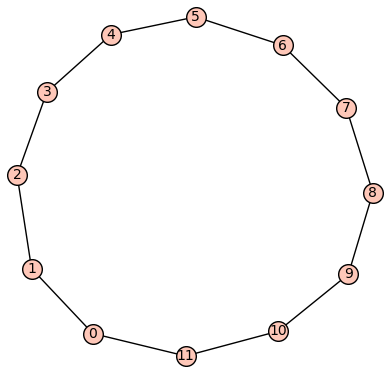

In [20]:
# Problem (a) (1) :

from sage.graphs.graph import Graph

# Create an empty graph
G = Graph()

# Number of nodes
N = 12

# Add nodes to the graph
G.add_vertices(range(N))

# Add edges to the graph
# This will create a simple pattern of connections among the nodes
edges = [(0, 1), (1, 2), (2, 3), (3, 4), (4, 5), (5, 6), (6, 7), (7, 8), (8, 9), (9, 10), (10, 11), (11, 0)]
G.add_edges(edges)

# Display the graph
G.show()

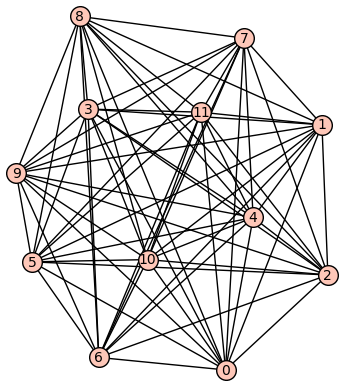

In [21]:
# Problem (a) (2) :

from sage.graphs.graph import Graph

# Specify the number of nodes
N = 12

# Create a complete graph
G = Graph()
G.add_vertices(range(N))

# Add edges to make it a complete graph
# In a complete graph, each pair of distinct vertices is connected by a unique edge
for i in range(N):
    for j in range(i + 1, N):
        G.add_edge(i, j)

# Display the graph
G.show()

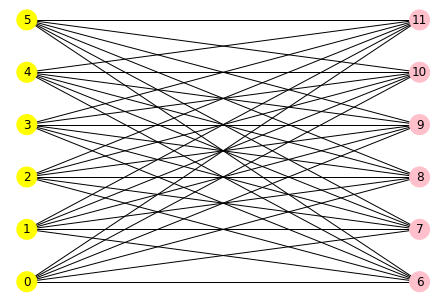

In [22]:
# Problem (a) (3) (Bipartite) :

from sage.graphs.graph import Graph
import networkx as nx
import matplotlib.pyplot as plt

# Create a bipartite graph using networkx
G = nx.Graph()

set1 = list(range(6))      # e.g., [0, 1, 2, 3, 4, 5]
set2 = list(range(6, 12))  # e.g., [6, 7, 8, 9, 10, 11]

# Add nodes from each set
G.add_nodes_from(set1, bipartite=0)
G.add_nodes_from(set2, bipartite=1)

# Add edges between the sets
G.add_edges_from([(v1, v2) for v1 in set1 for v2 in set2])

# Set colors for vertices
node_colors = ['yellow'] * len(set1) + ['pink'] * len(set2)

# Create a layout for bipartite graph
pos = nx.bipartite_layout(G, set1)

# Draw the graph using Matplotlib
nx.draw(G, pos, with_labels=True, node_color=node_colors, node_size=400)
plt.show()


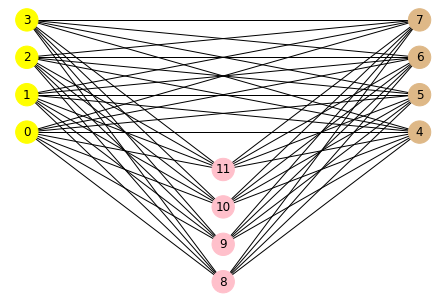

In [23]:
# Problem (a) (3) (Tripartite) :

from sage.graphs.graph import Graph
import networkx as nx
import matplotlib.pyplot as plt

# Create a tripartite graph using networkx
G = nx.Graph()

# Define three sets of vertices
set1 = list(range(4))  # e.g., [0, 1, 2, 3]
set2 = list(range(4, 8))  # e.g., [4, 5, 6, 7]
set3 = list(range(8, 12))  # e.g., [8, 9, 10, 11]

# Add nodes from each set
G.add_nodes_from(set1, bipartite=0)
G.add_nodes_from(set2, bipartite=1)
G.add_nodes_from(set3, bipartite=2)

# Add edges between the sets, but not within the same set
G.add_edges_from([(v1, v2) for v1 in set1 for v2 in set2])
G.add_edges_from([(v1, v3) for v1 in set1 for v3 in set3])
G.add_edges_from([(v2, v3) for v2 in set2 for v3 in set3])

# Set colors for vertices
node_colors = ['yellow'] * len(set1) + ['burlywood'] * len(set2) + ['pink'] * len(set3)

# Create a layout for the tripartite graph with set3 downward
pos = {}
for i, v in enumerate(set1):
    pos[v] = (0, i)

for i, v in enumerate(set2):
    pos[v] = (2, i)

for i, v in enumerate(set3):
    pos[v] = (1, i - len(set2))  # Adjust y-coordinate for set3

# Draw the graph using Matplotlib
nx.draw(G, pos, with_labels=True, node_color=node_colors, node_size=500)
plt.show()



Sorted degree sequence : [6, 6, 5, 5, 4, 4, 3, 3, 2, 2, 1, 1]
Chosen vertex with degree :  6
Updated degree sequence after removing edges : [5, 4, 4, 3, 3, 2, 3, 2, 2, 1, 1]

Sorted degree sequence : [5, 4, 4, 3, 3, 3, 2, 2, 2, 1, 1]
Chosen vertex with degree :  5
Updated degree sequence after removing edges : [3, 3, 2, 2, 2, 2, 2, 2, 1, 1]

Sorted degree sequence : [3, 3, 2, 2, 2, 2, 2, 2, 1, 1]
Chosen vertex with degree :  3
Updated degree sequence after removing edges : [2, 1, 1, 2, 2, 2, 2, 1, 1]

Sorted degree sequence : [2, 2, 2, 2, 2, 1, 1, 1, 1]
Chosen vertex with degree :  2
Updated degree sequence after removing edges : [1, 1, 2, 2, 1, 1, 1, 1]

Sorted degree sequence : [2, 2, 1, 1, 1, 1, 1, 1]
Chosen vertex with degree :  2
Updated degree sequence after removing edges : [1, 0, 1, 1, 1, 1, 1]

Sorted degree sequence : [1, 1, 1, 1, 1, 1, 0]
Chosen vertex with degree :  1
Updated degree sequence after removing edges : [0, 1, 1, 1, 1, 0]

Sorted degree sequence : [1, 1, 1, 1, 0

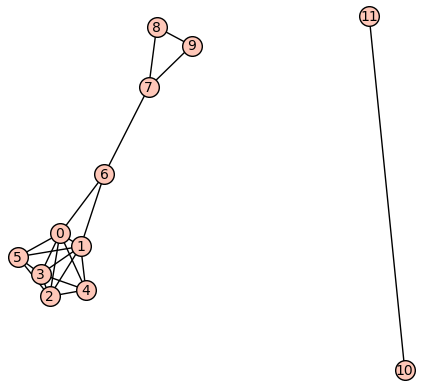

In [24]:
# Problem (a) (4) :

from sage.graphs.graph import Graph
import networkx as nx
import matplotlib.pyplot as plt

def graphExists(a):
    while True:
        a = sorted(a, reverse=True)
        
        print("\nSorted degree sequence :", a)

        if a[0] == 0 and a[-1] == 0:
            return True

        v = a[0]
        a = a[1:]

        if v > len(a):
            return False

        print(f"Chosen vertex with degree :  {v}")

        for i in range(v):
            a[i] -= 1

            if a[i] < 0:
                print("Updated degree sequence after removing edges :", a)
                return False

        print("Updated degree sequence after removing edges :", a)

    # Connect remaining vertices with non-zero degree to each other
    while any(remaining_degree > 0 for remaining_degree in a):
        # Find the vertex with the maximum remaining degree
        max_degree_vertex = a.index(max(filter(lambda x: x > 0, a)))

        print(f"Connecting vertex {max_degree_vertex} to other remaining vertices")

        # Connect it to all other remaining vertices
        for i in range(len(a)):
            if i != max_degree_vertex and a[i] > 0:
                a[max_degree_vertex] -= 1
                a[i] -= 1

                # Print the connection or save it for later use
                print(f"Connect vertex {max_degree_vertex} to vertex {i}")

        print("Updated degree sequence after connecting vertices :", a)

    return True

def printMat(degseq, n):
    mat = [[0] * n for i in range(n)]

    for i in range(n):
        for j in range(i + 1, n):
            if degseq[i] > 0 and degseq[j] > 0:
                degseq[i] -= 1
                degseq[j] -= 1
                mat[i][j] = 1
                mat[j][i] = 1

    
    g = Graph()
    g.add_vertices(range(n))
    for i in range(n):
        for j in range(n):
            if(i!=j and mat[i][j]):
                g.add_edges([(i,j)])
    g.plot().show()

###################################################################################################
                                # Test Case 1 # Not Graphical #
# a = [6, 6, 5, 5, 4, 4, 3]    


                                # Test Case 2 # Graphical #
# a = [3, 3, 2, 2, 2, 2, 2]


                                # Test Case 3 # Graphical #
a = [6, 6, 5, 5, 4, 4, 3, 3, 2, 2, 1, 1]    

###################################################################################################

if graphExists(a):
    print("\n-> Given Degree Sequence Is Graphical!")
    printMat(a, len(a))

else:
    print("\n-> Given Degree Sequence Is Not Graphical!")

--> Coloring <-- 
Pink: [0, 3, 7, 9]
Yellow: [1, 2]
Gray: [4, 8]
Red: [5, 6]
Green: [10]


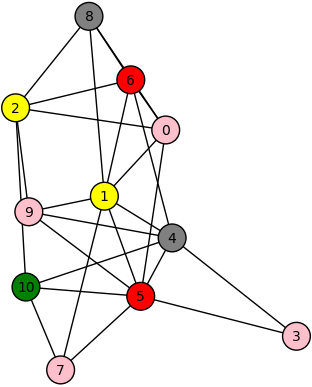

In [25]:
# Problem (b) (Graph Coloring Algorithm)

import random
def first_fit_coloring(G):
    # Initialize all vertices with no color (-1)
    coloring = {vertex: -1 for vertex in G.vertices()}
    
    # Assign the first available color to each vertex
    for vertex in G.vertices():
        available_colors = set(range(len(G.vertices())))  # Possible colors
        
        # Remove colors used by adjacent vertices
        for neighbor in G.neighbors(vertex):
            if coloring[neighbor] != -1:
                available_colors.discard(coloring[neighbor])
        
        # Assign the first available (lowest) color
        coloring[vertex] = min(available_colors)
    
    return coloring

###################################################################################################
                                # Random TestCase #
    
vertices = list(range(11))  # n vertices, labeled from [0] to [n-1]
G = Graph()                 # Create the graph
G.add_vertices(vertices)

for i in range(len(vertices)):
    for j in range(i + 1, len(vertices)):
        if(random.randint(0,1)):
            G.add_edges([(i,j)])

                                # Test Case 1 #

# vertices = list(range(4))  # 4 vertices, labeled from [0] to [3]
# G = Graph()                # Create the graph
# G.add_vertices(vertices)

# G.add_edges([(0 , 1)])
# G.add_edges([(0 , 2)])
# G.add_edges([(1 , 3)])
# G.add_edges([(2 , 3)])
# G.add_edges([(2 , 1)])

                                # Test Case 2 #
    
# vertices = list(range(5))  # 5 vertices, labeled from [0] to [4]
# G = Graph()                # Create the graph
# G.add_vertices(vertices)

# G.add_edges([(0 , 1)])
# G.add_edges([(0 , 2)])
# G.add_edges([(1 , 3)])
# G.add_edges([(2 , 4)])
# G.add_edges([(3 , 4)])
###################################################################################################

print("--> Coloring <-- ")
coloring = first_fit_coloring(G)

# Map color indices to actual colors
color_map = ['Pink', 'Yellow', 'Gray', 'Red', 'Green', 'Blue', 'Purple', 'Orange', 'Brown', 'Black']
vertex_colors = {color_map[color]: [] for color in set(coloring.values())}

for vertex, color in coloring.items():
    vertex_colors[color_map[color]].append(vertex)

for color, vertices_colored in vertex_colors.items():
    print(f"{color}:", vertices_colored)
    
# Visualize the coloring
G.plot(vertex_colors=vertex_colors, vertex_size=400).show()

Is Bipartite : Yes
Pink   :  {0, 3, 4, 6, 9, 10}
Yellow :  {1, 2, 5, 7, 8, 11}


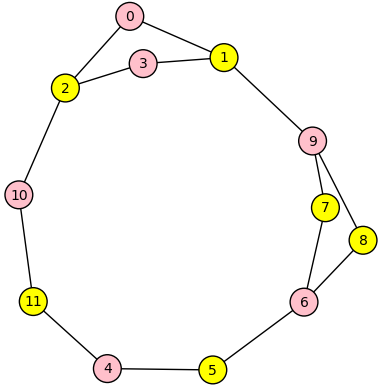

In [26]:
# Problem (b) (Bipartite Graph Testing)

from sage.graphs.graph import Graph
import networkx as nx
import matplotlib.pyplot as plt

class Graph1:
    def __init__(self, V):
        self.V = V
        self.graph = [[0 for column in range(V)] for row in range(V)]

    def Show(self):
        g = Graph()
        g.add_vertices(range(self.V))
        for i in range(self.V):
            for j in range(self.V):
                if i != j and self.graph[i][j]:
                    g.add_edges([(i, j)])
        return g

    def addEdge(self, i, j):
        self.graph[i][j] = 1

    def isBipartite(self, src):
        colorArr = [-1] * self.V
        colorArr[src] = 1
        queue = [src]

        while queue:
            u = queue.pop()
            if self.graph[u][u] == 1:
                return False

            for v in range(self.V):
                if self.graph[u][v] == 1 and colorArr[v] == -1:
                    colorArr[v] = 1 - colorArr[u]
                    queue.append(v)
                elif self.graph[u][v] == 1 and colorArr[v] == colorArr[u]:
                    return False

        return True

    def colorBipartiteSets(self):
        colorArr = [-1] * self.V
        set1, set2 = set(), set()

        for i in range(self.V):
            if colorArr[i] == -1:
                colorArr[i] = 1
                set1.add(i)
                queue = [i]

                while queue:
                    u = queue.pop()

                    for v in range(self.V):
                        if self.graph[u][v] == 1 and colorArr[v] == -1:
                            colorArr[v] = 1 - colorArr[u]
                            queue.append(v)
                            if colorArr[v] == 0:
                                set2.add(v)
                            else:
                                set1.add(v)  # Add to set1 when color is 1

        return set1, set2
    
###################################################################################################
                                    # Random TestCase #
        
# N = 12
# g = Graph1(N)

# for i in range(N):
#     for j in range(i + 1, N):
#         if(random.randint(0,1)):
#             g.addEdge(i,j);
    
                                # TestCase 1 # Not Bipartite #
    
# N = 4
# g = Graph1(N)

# g.addEdge(0, 1)
# g.addEdge(0, 2)
# g.addEdge(1, 3)
# g.addEdge(2, 3)
# g.addEdge(1, 2)

                                # Test Case 2 # Bipartite #

# N = 4
# g = Graph1(N)

# g.addEdge(0, 1)
# g.addEdge(0, 2)
# g.addEdge(1, 3)
# g.addEdge(2, 3)

                                # Test Case 3 # Bipartite #
    
# N = 6
# g = Graph1(N)

# g.addEdge(0, 1)
# g.addEdge(0, 2)
# g.addEdge(1, 3)
# g.addEdge(2, 3)
# g.addEdge(4, 5)

                                # Test Case 3 # Bipartite #
    
N = 12
g = Graph1(N)

g.addEdge(0, 1)
g.addEdge(0, 2)
g.addEdge(1, 3)
g.addEdge(2, 3)
g.addEdge(4, 5)
g.addEdge(6, 7)
g.addEdge(6, 8)
g.addEdge(7, 9)
g.addEdge(8, 9)
g.addEdge(1, 9)
g.addEdge(6, 5)
g.addEdge(11, 4)
g.addEdge(2, 10)
g.addEdge(10, 11)
###################################################################################################


graph = g.Show()
print("Is Bipartite : ", end='')

if g.isBipartite(0) :
    print("Yes")
    set1, set2 = g.colorBipartiteSets()

    # Map color indices to actual colors
    color_map = ['Pink', 'Yellow']

    # Visualize the coloring with sets positioned on the left and right sides
    vertex_colors = {color_map[0]: list(set1), color_map[1]: list(set2)}
    print('Pink   : ', set1)
    print('Yellow : ', set2)
    graph.plot(vertex_colors=vertex_colors, layout='spring', vertex_size=400).show()
else :
    print("No")
    graph.plot(layout='spring', vertex_size=400).show()

--> Initial Graph <--


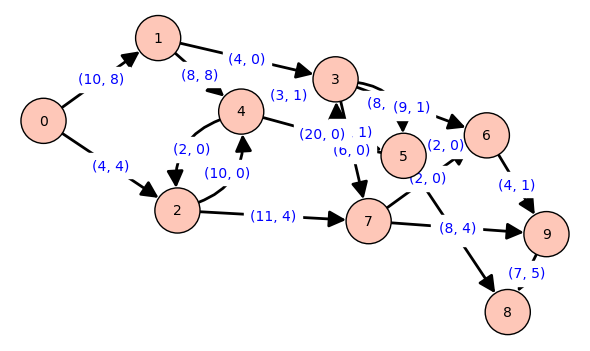

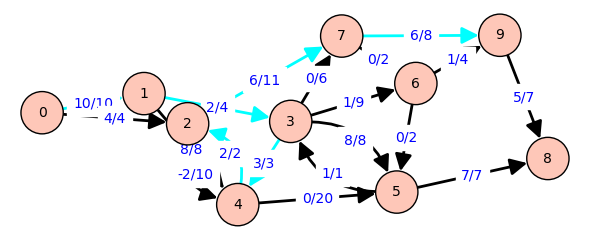

Max Flow: 14


In [27]:
# Problem (b) (Max-Flow Algorithm)

from sage.graphs.digraph import DiGraph

def ford_fulkerson_visualized(G, source, sink):
    # Initialize the residual graph with user-defined initial flows
    residual_graph = {u: {v: [G.edge_label(u, v)[0] - G.edge_label(u, v)[1], G.edge_label(u, v)[1]] for v in G.neighbors_out(u)} for u in G.vertices()}
    for u in G.vertices():
        for v in G.neighbors_out(u):
            if v not in residual_graph:
                residual_graph[v] = {}
            if u not in residual_graph[v]:
                residual_graph[v][u] = [0, 0]  # Initialize reverse edge with 0 capacity and 0 flow
    
    layout = G.layout_spring()

    def find_path(source, sink, path):
        if source == sink:
            return path

        for neighbor in residual_graph[source]:
            # Check if residual capacity (capacity - flow) is greater than 0
            if residual_graph[source][neighbor][0] > 0 and neighbor not in path:
                result = find_path(neighbor, sink, path + [neighbor])
                if result:
                    return result

        return []

    def path_flow(path):
        flow = float('inf')
        for u, v in zip(path, path[1:]):
            flow = min(flow, residual_graph[u][v][0])  # Check only the residual capacity
        return flow

    def find_augmenting_path(source, sink):
        path = find_path(source, sink, [source])
        while path:
            yield path
            path = find_path(source, sink, [source])

    max_flow = 0
    graphs = []

    for augmenting_path in find_augmenting_path(source, sink):
        flow = min(path_flow(augmenting_path), float('inf'))

        # Update residual capacities and flows
        for u, v in zip(augmenting_path, augmenting_path[1:]):
            residual_graph[u][v][0] -= flow  # Decrease residual capacity
            residual_graph[u][v][1] += flow  # Increase flow
            residual_graph[v][u][0] += flow  # Increase reverse edge residual capacity
            residual_graph[v][u][1] -= flow  # Decrease reverse edge flow

        max_flow += flow

        # Visualization step
        G_copy = G.copy()
        for u, v, _ in G_copy.edges():
            if v in residual_graph[u]:
                current_flow = residual_graph[u][v][1]
                capacity = G.edge_label(u, v)[0]
                G_copy.set_edge_label(u, v, f"{current_flow}/{capacity}")

        graphs.append(G_copy)
        # Highlight the chosen path in blue
        path_edges = [(u, v) for u, v in zip(augmenting_path, augmenting_path[1:])]
        G_copy.plot(pos=layout, edge_labels=True, edge_colors={'cyan': path_edges}, vertex_size=400).show()
        graphs.append(G_copy)

    # Calculate total flow after the algorithm
    total_flow = sum(residual_graph[source][neighbor][1] for neighbor in residual_graph[source])

    return max_flow, total_flow, graphs

G = DiGraph({
    0: {1: (10, 8), 2: (4, 4)},
    1: {3: (4, 0), 4: (8, 8)},
    2: {4: (10, 0), 7: (11, 4)},
    3: {4: (3, 1), 5: (8,8) , 6: (9,1) , 7: (6,0) },
    4: {2: (2, 0), 5: (20, 0)},
    5: {3: (1, 1), 8: (7, 7)},
    6: {9: (4, 1), 5: (2, 0)},
    7: {9: (8, 4), 6: (2, 0)},
    9: {8: (7, 5)}
}, multiedges=False)

source = 0
sink = 9

print("--> Initial Graph <--")
G.plot(edge_labels=True, vertex_size=400).show()


max_flow, total_flow, graphs = ford_fulkerson_visualized(G, source, sink)
print(f"Max Flow: {total_flow}")